In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data = pd.read_excel(r'/Users/saharshmaheshwari/Desktop/DS/codebasics ML/Project 1 - Healthcare premium prediction/project_1_datacleaning_&_EDA_resources/premiums.xlsx')

In [4]:
df = data.copy()

In [5]:
df.shape

(50000, 13)

In [6]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [7]:
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [8]:
df.sample(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
48605,33,Male,Northwest,Married,3,Overweight,Regular,Salaried,25L - 40L,27,Thyroid,Bronze,14120
48188,50,Male,Northwest,Married,2,Overweight,Occasional,Salaried,25L - 40L,36,Diabetes,Silver,21520
32232,41,Male,Southeast,Married,3,Underweight,Regular,Salaried,<10L,6,High blood pressure,Bronze,12276
578,28,Female,Southeast,Married,3,Normal,No Smoking,Self-Employed,<10L,8,Diabetes,Silver,15808
43544,21,Male,Southeast,Married,3,Underweight,Regular,Self-Employed,10L - 25L,18,High blood pressure,Silver,8675
23604,37,Male,Northeast,Unmarried,0,Overweight,No Smoking,Salaried,10L - 25L,12,No Disease,Gold,21694
31924,35,Female,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,25L - 40L,34,Diabetes,Silver,15739
43666,27,Female,Southwest,Unmarried,0,Overweight,No Smoking,Salaried,<10L,6,Diabetes & Thyroid,Bronze,12709
42232,26,Female,Southwest,Married,3,Underweight,Occasional,Freelancer,10L - 25L,19,Heart disease,Silver,21336
27135,29,Male,Southwest,Married,2,Overweight,Regular,Freelancer,10L - 25L,13,Diabetes & Heart disease,Silver,24589


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   age                    50000 non-null  int64 
 1   gender                 50000 non-null  object
 2   region                 50000 non-null  object
 3   marital_status         50000 non-null  object
 4   number_of_dependants   50000 non-null  int64 
 5   bmi_category           50000 non-null  object
 6   smoking_status         49989 non-null  object
 7   employment_status      49998 non-null  object
 8   income_level           49987 non-null  object
 9   income_lakhs           50000 non-null  int64 
 10  medical_history        50000 non-null  object
 11  insurance_plan         50000 non-null  object
 12  annual_premium_amount  50000 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.0+ MB


-few null values to be dealt later

Cheking for duplicate records

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,34.593480,1.712080,23.018200,15768.116320
std,15.000437,1.498248,24.219197,8419.839675
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13929.000000
75%,45.000000,3.000000,31.000000,22275.250000
max,356.000000,5.000000,930.000000,43471.000000


In [12]:
df.describe(include='object')

,gender,region,marital_status,bmi_category,smoking_status,employment_status,income_level,medical_history,insurance_plan
count,50000,50000,50000,50000,49989,49998,49987,50000,50000
unique,2,4,2,4,6,3,4,9,3
top,Male,Southeast,Unmarried,Normal,No Smoking,Salaried,<10L,No Disease,Bronze
freq,27480,17520,25681,23511,27366,20968,18667,21177,21573


In [15]:
(df['age']>100).sum()

58

In [16]:
df = df.loc[df['age']<=100]

In [19]:
(df['number_of_dependants']<0).sum()

72

assuming -ve values due to an error, converting then to positive

In [20]:
df['number_of_dependants'] = abs(df['number_of_dependants'])

/var/folders/d9/m0t639fj1kx9j60ddl0kyzlr0000gn/T/ipykernel_45403/1378062861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['number_of_dependants'] = abs(df['number_of_dependants'])


In [21]:
#df = df.loc[df['Number Of Dependants']>=0]

### null values

In [23]:
df.dropna(inplace = True)

/var/folders/d9/m0t639fj1kx9j60ddl0kyzlr0000gn/T/ipykernel_45403/1791587065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


In [25]:
quantile_thresold = df.income_lakhs.quantile(0.999)
quantile_thresold

100.0

In [26]:
df = df.loc[df.income_lakhs<=quantile_thresold]

In [27]:
df.shape

(49908, 13)

In [28]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns  

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

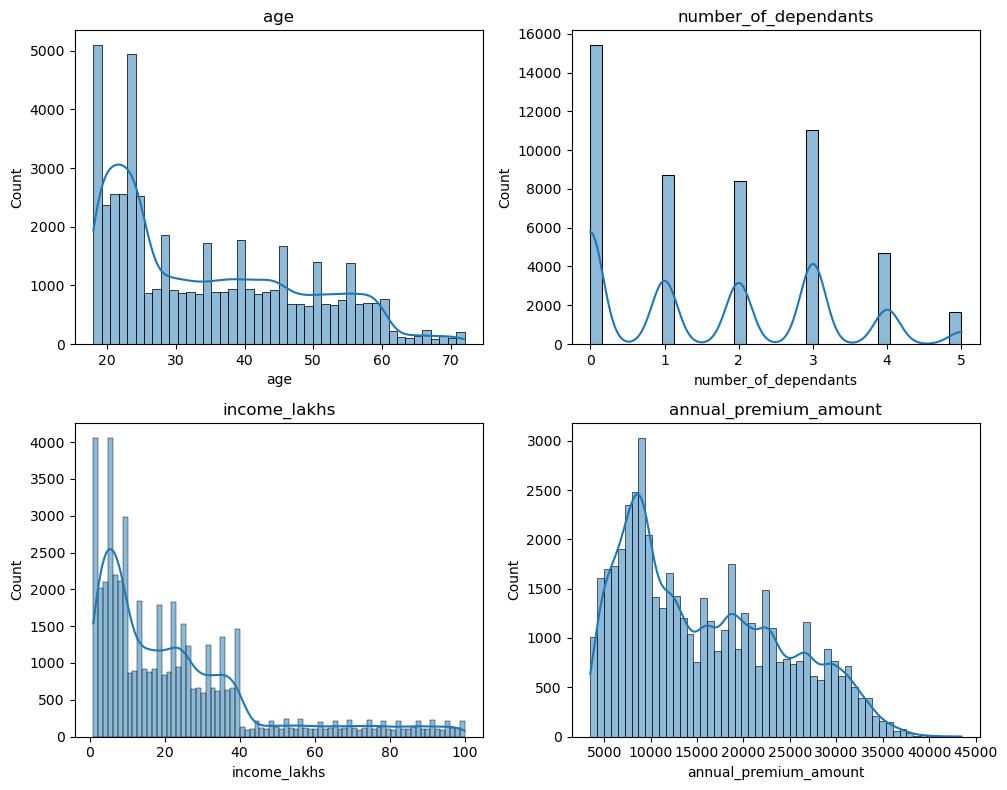

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))  # Adjust the size as necessary

for i, column in enumerate(numeric_columns):
    ax = axs[i//2, i%2]  # Determines the position of the subplot in the grid
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [30]:
categorical_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'income_level', 'medical_history', 'insurance_plan']
for col in categorical_cols:
    print(col, ":", df[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


In [31]:
df['smoking_status'].replace({
    'Not Smoking': 'No Smoking',
    'Does Not Smoke': 'No Smoking',
    'Smoking=0': 'No Smoking'
}, inplace=True)

df['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

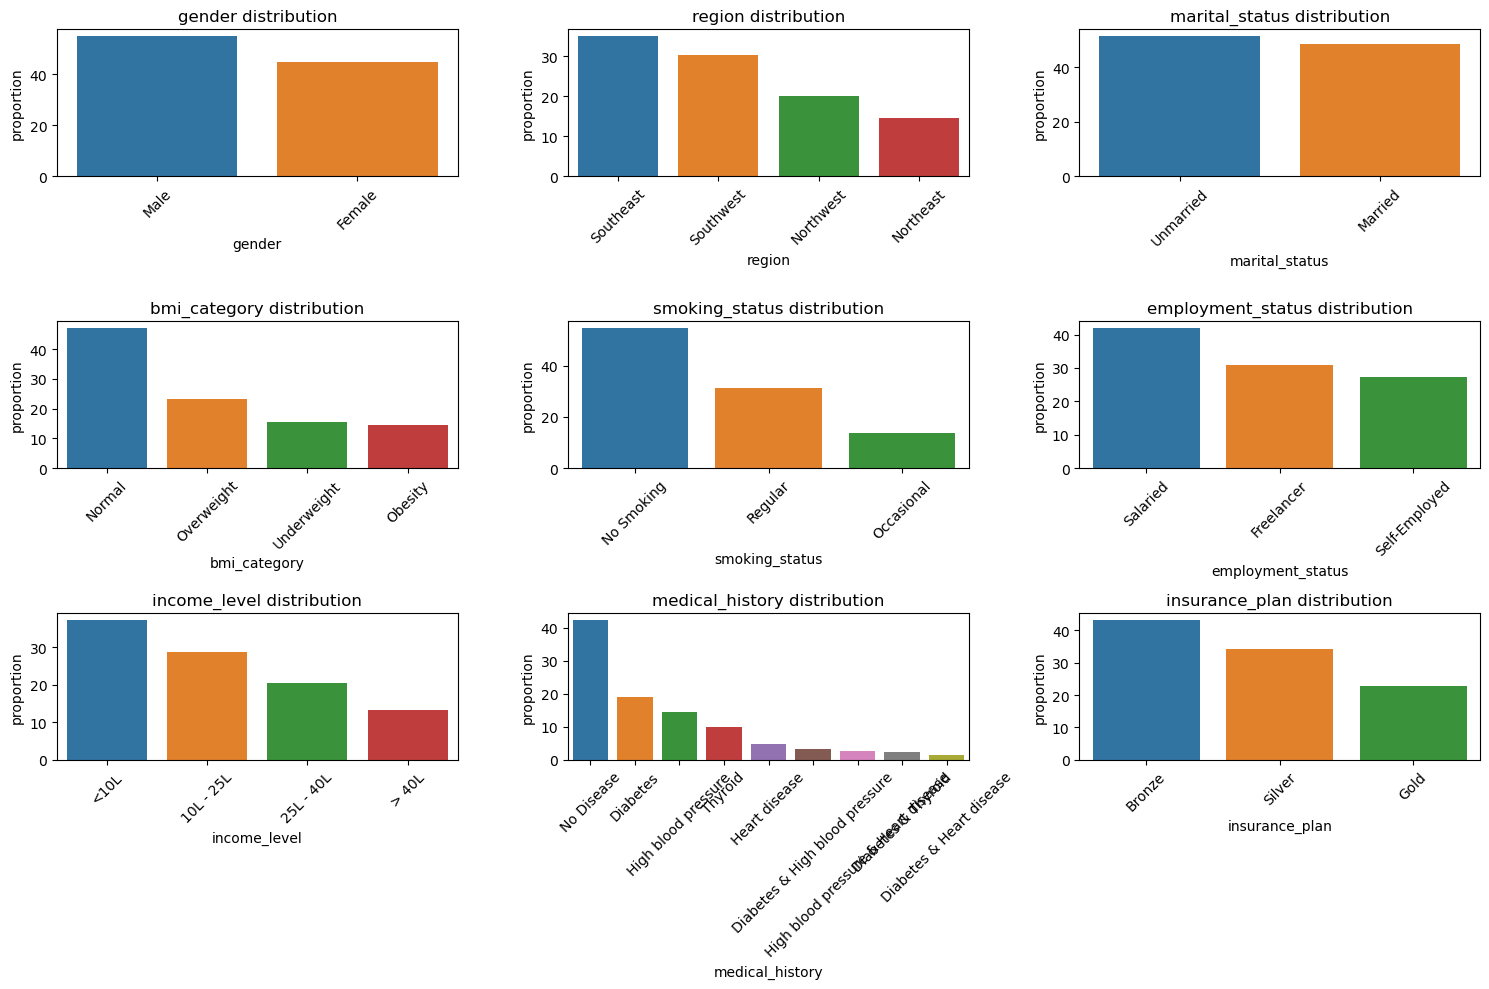

In [34]:
# Set the number of rows and columns for subplots (3 columns in each row)
num_cols = 3
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols  # Calculate number of rows needed

# Set up the figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))  # Adjust the figure size
axes = axes.flatten()  # Flatten the 2D array of axes to 1D for easier indexing

# Loop over the categorical columns and create a subplot for each
for i, col in enumerate(categorical_cols):
    sns.barplot(
        x=df[col].value_counts().index, 
        y=df[col].value_counts(normalize=True)*100, 
        ax=axes[i]
    )
    
    # Set title for each subplot
    axes[i].set_title(f'{col} distribution')
    
    # Rotate x-tick labels if needed
    axes[i].tick_params(axis='x', rotation=45)

# Remove empty subplots if the number of plots is less than rows*cols
# for i in range(len(categorical_cols), len(axes)):
#     fig.delaxes(axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Feature Engineering

In [36]:
df.medical_history.value_counts()

medical_history
No Disease                             21138
Diabetes                                9533
High blood pressure                     7209
Thyroid                                 4917
Heart disease                           2343
Diabetes & High blood pressure          1641
High blood pressure & Heart disease     1273
Diabetes & Thyroid                      1115
Diabetes & Heart disease                 739
Name: count, dtype: int64

In [37]:
#risk scores for each condition
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

In [38]:
df[['disease1', 'disease2']] = df['medical_history'].str.split(" & ", expand=True).apply(lambda x: x.str.lower())
df['disease1'].fillna('none', inplace=True)
df['disease2'].fillna('none', inplace=True)

In [39]:
df['total_risk_score'] = df['disease1'].map(risk_scores).astype(int)+df['disease2'].map(risk_scores).astype(int)

In [40]:
df.sample(10)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score
9244,32,Male,Northwest,Married,4,Normal,No Smoking,Salaried,10L - 25L,18,Diabetes & Thyroid,Bronze,11377,diabetes,thyroid,11
2501,27,Male,Northwest,Unmarried,0,Overweight,Regular,Salaried,<10L,4,No Disease,Bronze,11616,no disease,none,0
12648,28,Female,Southeast,Unmarried,1,Overweight,No Smoking,Self-Employed,25L - 40L,28,Diabetes,Gold,24028,diabetes,none,6
8950,66,Female,Southwest,Married,1,Underweight,No Smoking,Salaried,10L - 25L,24,High blood pressure & Heart disease,Gold,37016,high blood pressure,heart disease,14
8068,26,Male,Northwest,Unmarried,1,Overweight,Regular,Salaried,<10L,6,No Disease,Bronze,12274,no disease,none,0
7075,55,Male,Southeast,Married,4,Overweight,Occasional,Freelancer,10L - 25L,13,Diabetes,Gold,29642,diabetes,none,6
46512,38,Female,Southeast,Unmarried,0,Normal,No Smoking,Salaried,<10L,3,No Disease,Bronze,7106,no disease,none,0
1056,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Salaried,<10L,7,No Disease,Silver,8048,no disease,none,0
26106,62,Female,Northeast,Married,1,Normal,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Silver,24888,diabetes,high blood pressure,12
44337,20,Male,Northwest,Unmarried,0,Normal,No Smoking,Freelancer,25L - 40L,37,No Disease,Bronze,3779,no disease,none,0


In [41]:
df['insurance_plan_num'] = df['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})

In [42]:
df['income_level_num'] = df['income_level'].map({'<10L':1, '10L - 25L': 2, '25L - 40L':3, '> 40L':4})

In [43]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
df3 = pd.get_dummies(df, columns=nominal_cols, drop_first=True, dtype=int)
df3.head(3)

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='income_lakhs', ylabel='Count'>

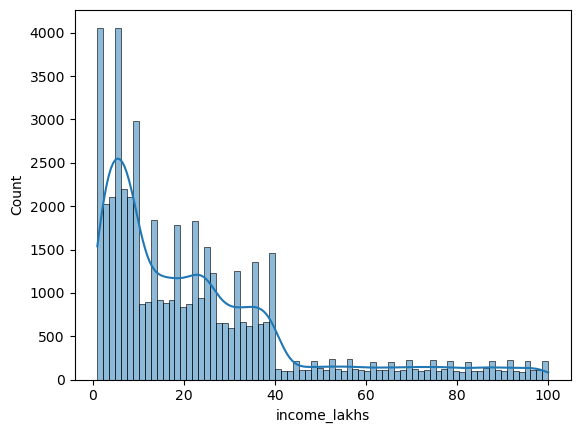

In [44]:
sns.histplot(df3.income_lakhs , kde=True)

In [45]:
df4 = df3.drop(['medical_history','disease1', 'disease2', 'total_risk_score','income_level','insurance_plan'], axis=1)
df4.head(3) 

,age,number_of_dependants,income_lakhs,annual_premium_amount,insurance_plan_num,income_level_num,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,6,9053,1,1,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,6,16339,1,1,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,20,18164,2,2,0,0,0,0,0,0,0,0,0,0,0,1


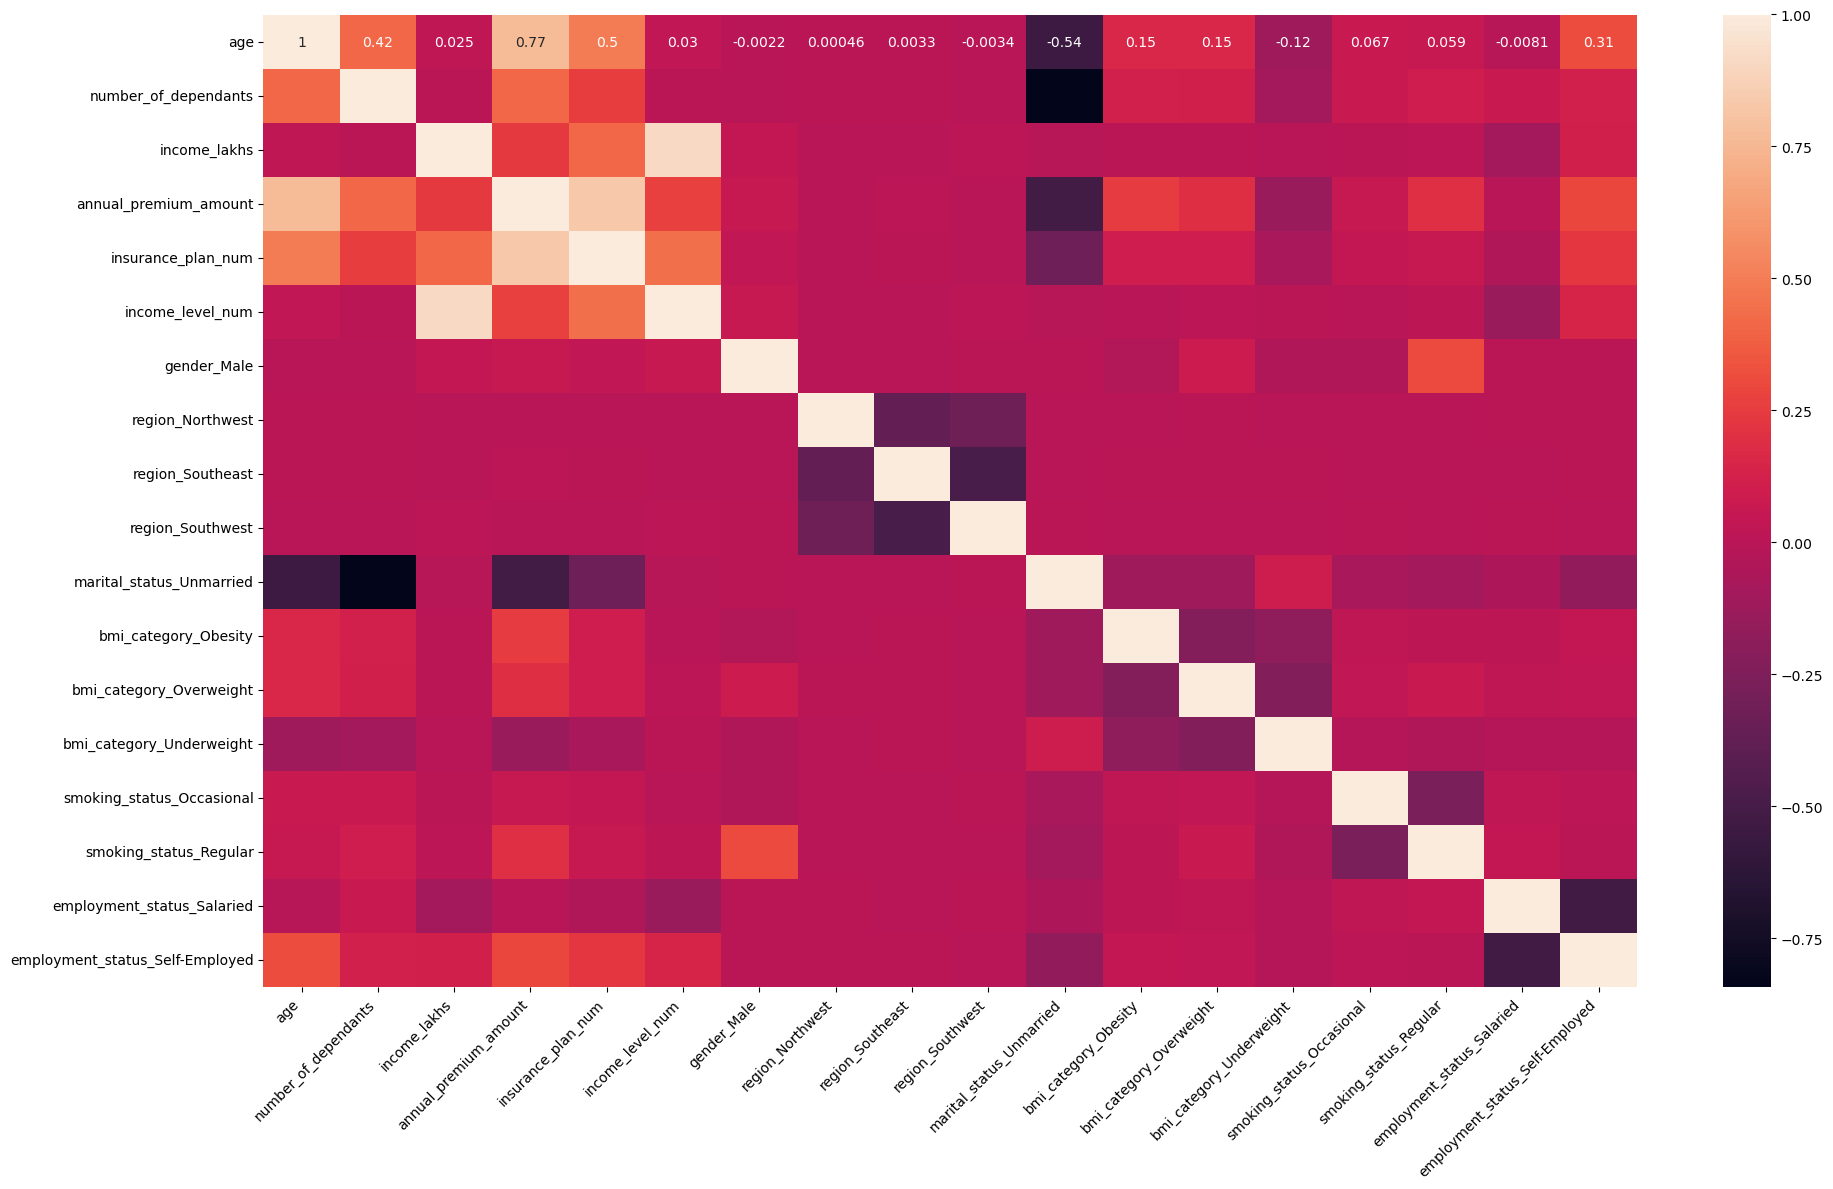

In [46]:
cm = df4.corr()

plt.figure(figsize=(20,12))
sns.heatmap(cm, annot=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
X = df4.drop('annual_premium_amount', axis='columns')
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['age','number_of_dependants', 'income_lakhs',  'income_level_num', 'insurance_plan_num']
scaler = MinMaxScaler()

X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
X.describe()

,age,number_of_dependants,income_lakhs,insurance_plan_num,income_level_num,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.221110,0.397401,0.365900,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.223946,0.392459,0.349711,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.161616,0.500000,0.333333,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.303030,0.500000,0.666667,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [49]:
calculate_vif(X)

,Column,VIF
0,age,4.240961
1,number_of_dependants,4.398746
2,income_lakhs,11.182932
3,insurance_plan_num,3.580250
4,income_level_num,12.449357
5,gender_Male,2.421479
6,region_Northwest,2.098330
7,region_Southeast,2.913442
8,region_Southwest,2.662732
9,marital_status_Unmarried,3.410573


In [50]:
calculate_vif(X.drop('income_level_num', axis="columns"))

,Column,VIF
0,age,4.220853
1,number_of_dependants,4.389999
2,income_lakhs,2.480473
3,insurance_plan_num,3.440650
4,gender_Male,2.409971
5,region_Northwest,2.096505
6,region_Southeast,2.910702
7,region_Southwest,2.660289
8,marital_status_Unmarried,3.393171
9,bmi_category_Obesity,1.351127


In [51]:
X_reduced = X.drop('income_level_num', axis="columns")

# Model Training

In [54]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.30, random_state=10)

# shape of the X_train, X_test, y_train, y_test features
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (34935, 16)
x test:  (14973, 16)
y train:  (34935,)
y test:  (14973,)


In [58]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [65]:
models = [LinearRegression(), Lasso(), 
		RandomForestRegressor(), Ridge() , XGBRegressor()] 


# Loop over the models and evaluate them
for model in models:
    model.fit(X_train, y_train)  # Fit the model to training data
    
    # Training predictions
    train_preds = model.predict(X_train)
    
    # Test predictions
    test_preds = model.predict(X_test)
    
    # Calculate and print training and test errors (MAE and R²)
    print(f'{model.__class__.__name__}:')
    print('Training Error (MAE):', mean_absolute_error(y_train, train_preds))
    print('Test Error (MAE):', mean_absolute_error(y_test, test_preds))
    print('Training R² Score:', r2_score(y_train, train_preds))
    print('Test R² Score:', r2_score(y_test, test_preds))
    print('-'*40)  # To separate output for each model


LinearRegression:
Training Error (MAE): 2004.4003916534932
Test Error (MAE): 2012.5967173288188
Training R² Score: 0.9078868802710681
Test R² Score: 0.9084933478991022
----------------------------------------
Lasso:
Training Error (MAE): 2004.387140371696
Test Error (MAE): 2012.1739051809523
Training R² Score: 0.907883882877383
Test R² Score: 0.908529066792067
----------------------------------------
RandomForestRegressor:
Training Error (MAE): 558.9808621200739
Test Error (MAE): 1439.4817103085754
Training R² Score: 0.9923899515568462
Test R² Score: 0.9527313406270954
----------------------------------------
Ridge:
Training Error (MAE): 2004.3265053589832
Test Error (MAE): 2012.5252718733732
Training R² Score: 0.9078868352927884
Test R² Score: 0.9084925454108232
----------------------------------------
XGBRegressor:
Training Error (MAE): 1200.4247745953423
Test Error (MAE): 1352.8770005084673
Training R² Score: 0.9657865880834774
Test R² Score: 0.9576278779535243
---------------------

In [66]:
model_xgb = XGBRegressor(n_estimators=20, max_depth=3)
model_xgb.fit(X_train, y_train)
model_xgb.score(X_test, y_test)

0.9580902270628601

In [68]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

In [69]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}
random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_score_

0.958051071898162

In [70]:
best_model = random_search.best_estimator_

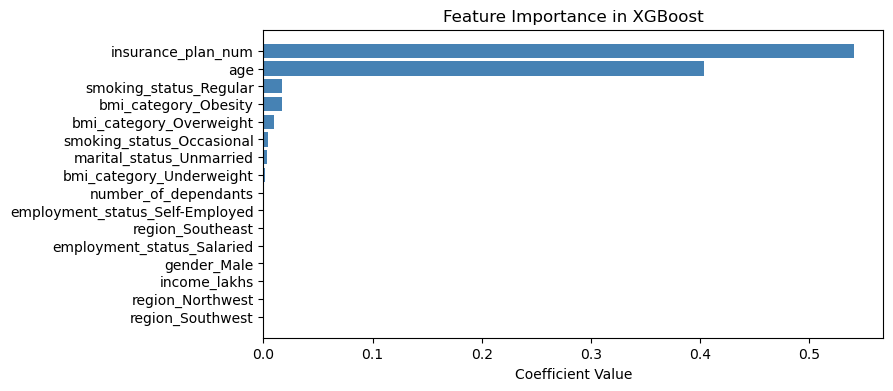

In [71]:
feature_importance = best_model.feature_importances_

# Create a DataFrame for easier handling
coef_df = pd.DataFrame(feature_importance, index=X_train.columns, columns=['Coefficients'])

# Sort the coefficients for better visualization
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

# Plotting
plt.figure(figsize=(8, 4))
plt.barh(coef_df.index, coef_df['Coefficients'], color='steelblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in XGBoost')
plt.show()

In [72]:
y_pred = best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
3598,20554,20492.914062,-61.085938,-0.297197
35794,29647,31527.988281,1880.988281,6.344616
43608,20560,22756.757812,2196.757812,10.684620
42730,5018,7071.460449,2053.460449,40.921890
18936,8929,7631.945801,-1297.054199,-14.526310


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


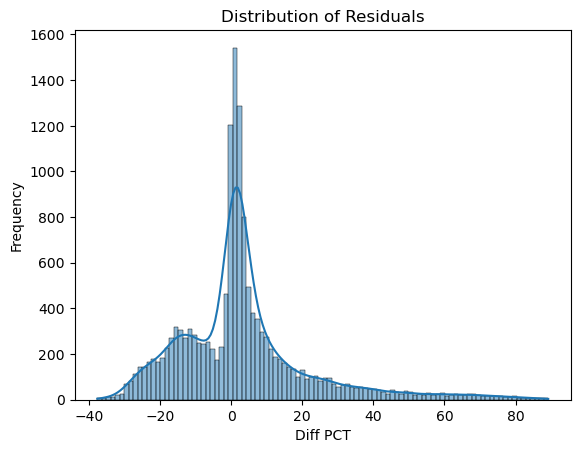

In [73]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [74]:
conda install joblib

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - joblib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    joblib-1.4.2               |  py311hca03da5_0         533 KB
    ------------------------------------------------------------
                                           Total:         533 KB

The following packages will be UPDATED:

  joblib                              1.2.0-py311hca03da5_0 --> 1.4.2-py311hca03da5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [75]:
from joblib import dump

In [78]:
dump(best_model , '/Users/saharshmaheshwari/Desktop/DS/codebasics ML/Project 1 - Healthcare premium prediction/artifacts/model_v1.joblib')

['/Users/saharshmaheshwari/Desktop/DS/codebasics ML/Project 1 - Healthcare premium prediction/artifacts/model_v1.joblib']

In [79]:
cols_to_scale

['age',
 'number_of_dependants',
 'income_lakhs',
 'income_level_num',
 'insurance_plan_num']

In [80]:
scaler_with_cols = {
    'scaler':scaler,
    'cols_to_scale':cols_to_scale
}

In [81]:
scaler_with_cols

{'scaler': MinMaxScaler(),
 'cols_to_scale': ['age',
  'number_of_dependants',
  'income_lakhs',
  'income_level_num',
  'insurance_plan_num']}

In [82]:
dump(scaler_with_cols,'/Users/saharshmaheshwari/Desktop/DS/codebasics ML/Project 1 - Healthcare premium prediction/artifacts/scaler_with_cols.joblib')

['/Users/saharshmaheshwari/Desktop/DS/codebasics ML/Project 1 - Healthcare premium prediction/artifacts/scaler_with_cols.joblib']

In [83]:
conda install streamlit

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - streamlit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    streamlit-1.38.0           |  py311hca03da5_0         7.7 MB
    ------------------------------------------------------------
                                           Total:         7.7 MB

The following packages will be UPDATED:

  streamlit                          1.30.0-py311hca03da5_0 --> 1.38.0-py311hca03da5_0 



                                                                                
Preparing transaction: done
Verifying transaction: done
Executing transaction: done

Note: you may need to restart the kernel to use updated packages.


In [84]:
X_train.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan_num',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')